Projet adult :


Partie 1 : Exploration des données :

Variables :



In [1]:
######## IMPORT #########

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [2]:
####### chargement des données 
data = pd.read_csv("adult.data",
 names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status", "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss", "Hours per week", "Country", "Target"],
 sep=r'\s*,\s*',
 engine='python',
 na_values="?")
data.tail()



,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Variables  explicatives:

Age : quantitative
Workclass : qualitative, 8 modalités
fnlwgt : quantitative
Education : qualitative 16 modalités
Education Num : quantitative
Martial Status : qualitative 7 modalités
Occupation : qualitative 14 modalités
Relationship : qualitative 6 modalité
Race : qualitative 5
Sex : qualitative 2
Capital gain : quantitative
Capital loss : quantitative
Hours per week : quantitative
Country : 42

Variable à expliquer :

Target : qualitative 2 classes

In [3]:
data.isnull().any()
data.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

On commence par supprimer les observations contenant des valeurs manquantes. Après suppression de ces observations on obtient 30162 observations ce qui correspond à 92,6% des observations du dataframe original. Le nombre d'observations retirées est suffisament faible.

In [4]:
data=data.dropna()
data.shape

(30162, 15)

In [5]:
X = data.iloc[:,:14]
y= data.iloc[:,14]

In [6]:
data.describe()


,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


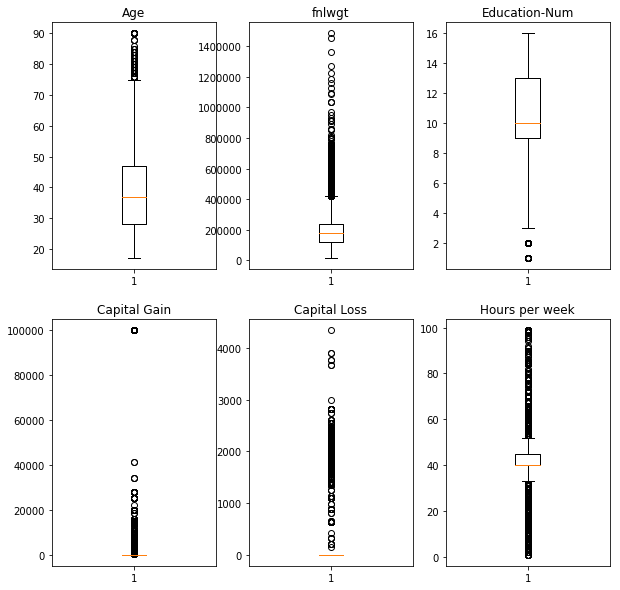

In [7]:
fig = plt.figure(figsize=(10, 10))
ax1=fig.add_subplot(2,3,1)
ax1.set_title("Age")
ax1.boxplot(X["Age"])
ax2=fig.add_subplot(2,3,2)
ax2.set_title("fnlwgt")
ax2.boxplot(X["fnlwgt"])
ax3=fig.add_subplot(2,3,3)
ax3.set_title("Education-Num")
ax3.boxplot(X["Education-Num"])
ax4=fig.add_subplot(2,3,4)
ax4.set_title("Capital Gain")
ax4.boxplot(X["Capital Gain"])
ax5=fig.add_subplot(2,3,5)
ax5.set_title("Capital Loss")
ax5.boxplot(X["Capital Loss"])
ax6=fig.add_subplot(2,3,6)
ax6.set_title("Hours per week")
ax6.boxplot(X["Hours per week"])
plt.show()

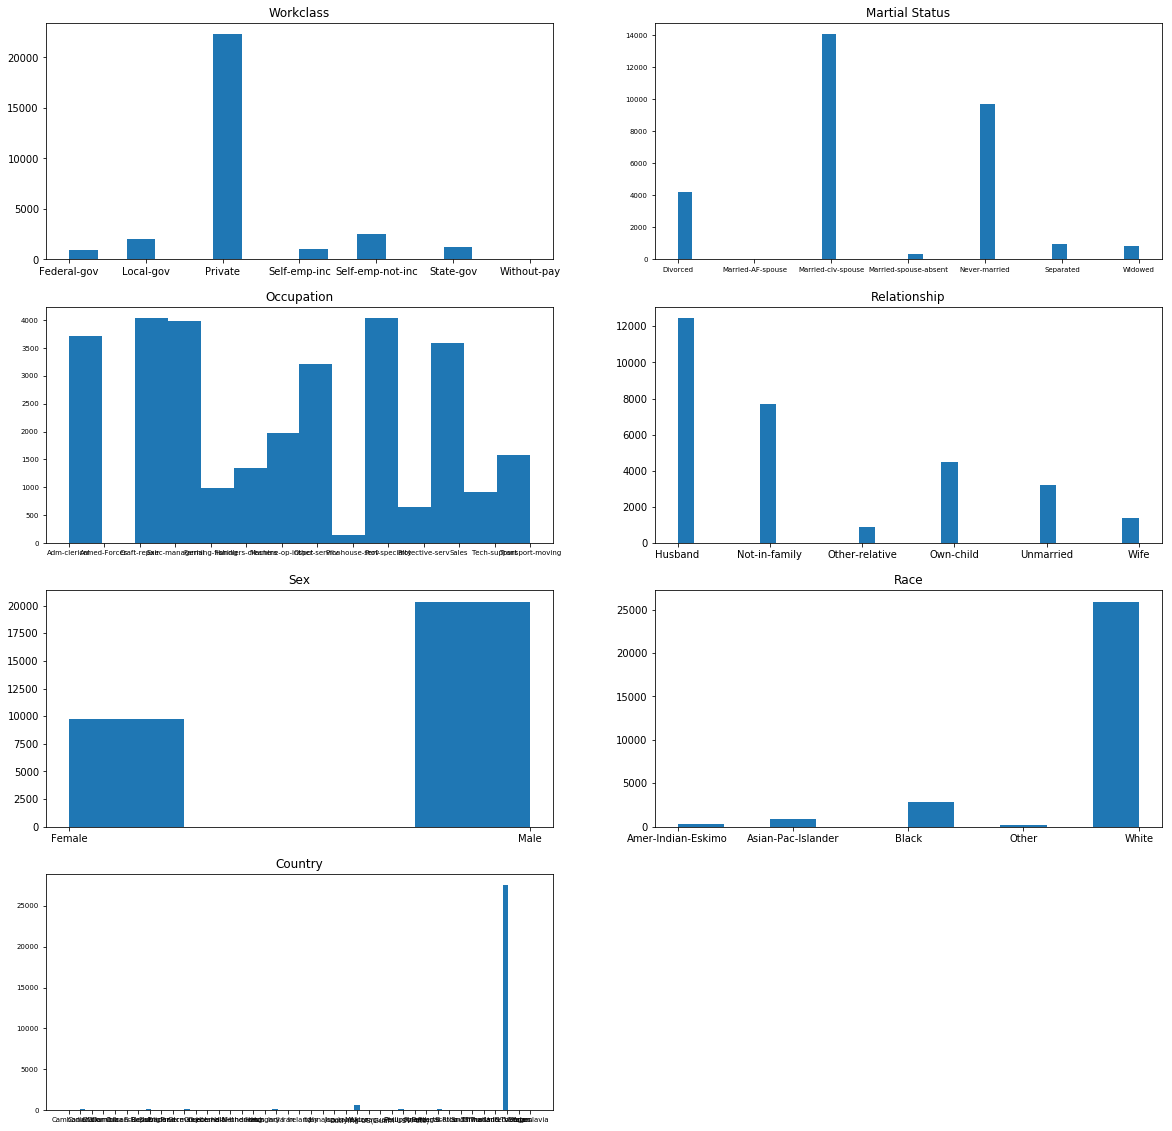

In [8]:
fig = plt.figure(figsize=(20,20 ))
ax1=fig.add_subplot(4,2,1)
ax1.set_title("Workclass")
ax1.hist(X["Workclass"],bins=16)
ax2=fig.add_subplot(4,2,2)
ax2.set_title("Martial Status")
ax2.hist(X["Martial Status"],bins=32)
ax2.tick_params(labelsize=7)
ax3=fig.add_subplot(4,2,3)
ax3.set_title("Occupation")
ax3.hist(X["Occupation"],bins=14)
ax3.tick_params(labelsize=7)
ax4=fig.add_subplot(4,2,4)
ax4.set_title("Relationship")
ax4.hist(X["Relationship"],bins=28)
ax5=fig.add_subplot(4,2,5)
ax5.set_title("Sex")
ax5.hist(X["Sex"],bins=4)
ax6=fig.add_subplot(4,2,6)
ax6.set_title("Race")
ax6.hist(X["Race"],bins=10)
ax7=fig.add_subplot(4,2,7)
ax7.set_title("Country")
ax7.hist(X["Country"],bins=84)
ax7.tick_params(labelsize=7)
plt.show()

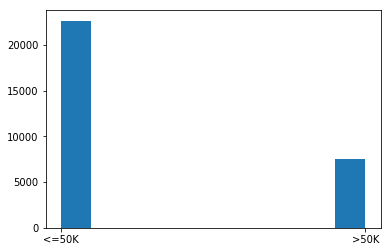

In [9]:
plt.hist(y)
plt.show()

In [10]:
print(y.groupby(y).count())

Target
<=50K    22654
>50K      7508
Name: Target, dtype: int64


One hot encoding :

In [11]:
data_dummies = pd.get_dummies(X)
print(list(data_dummies.columns))

['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Workclass_Federal-gov', 'Workclass_Local-gov', 'Workclass_Private', 'Workclass_Self-emp-inc', 'Workclass_Self-emp-not-inc', 'Workclass_State-gov', 'Workclass_Without-pay', 'Education_10th', 'Education_11th', 'Education_12th', 'Education_1st-4th', 'Education_5th-6th', 'Education_7th-8th', 'Education_9th', 'Education_Assoc-acdm', 'Education_Assoc-voc', 'Education_Bachelors', 'Education_Doctorate', 'Education_HS-grad', 'Education_Masters', 'Education_Preschool', 'Education_Prof-school', 'Education_Some-college', 'Martial Status_Divorced', 'Martial Status_Married-AF-spouse', 'Martial Status_Married-civ-spouse', 'Martial Status_Married-spouse-absent', 'Martial Status_Never-married', 'Martial Status_Separated', 'Martial Status_Widowed', 'Occupation_Adm-clerical', 'Occupation_Armed-Forces', 'Occupation_Craft-repair', 'Occupation_Exec-managerial', 'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners', 

In [12]:
data_dummies.shape

(30162, 104)

In [13]:
X_scaled = StandardScaler().fit_transform(data_dummies)

In [14]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, y], axis = 1)

K-PPV :

MLP :

Déterminer les hyperparamètres du réseaux par grid search cross validation : (nombre de couche, nombre de neurones sur chaque couche, pas d'apprentissage)

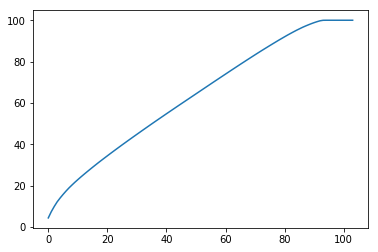